In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

In [26]:
# Load dataset
data_train  = pd.read_csv("Dataset/train.csv")
data_test   = pd.read_csv("Dataset/test.csv")
data_train  = data_train[["PassengerId","Survived","Pclass","Name",
                          "Sex","Age","SibSp","Parch",
                          "Ticket","Fare","Embarked"]]
data_test   = data_test[["PassengerId","Pclass","Name",
                          "Sex","Age","SibSp","Parch",
                          "Ticket","Fare","Embarked"]]
data_train.fillna(0)
data_test.fillna(0)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,S


In [27]:
x_train     = data_train[["Sex","Age","SibSp","Parch",
                          "Fare","Embarked"]].values
y_train     = data_train[["Survived"]].values
row,coloumn = x_train.shape

In [28]:
# Encoding
# x
for i in range(coloumn):
    x_train[: , i] = LabelEncoder().fit_transform(x_train[:,i])
# y
y_train            = LabelEncoder().fit_transform(y_train)

C:\Python3_7\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [29]:
# Normalize X
maxx = []
minn = []
for i in range(coloumn):
    maxx.append(np.max(x_train[:,i]))
    minn.append(np.min(x_train[:,i]))
print(maxx)
print(minn)

[1, 88, 6, 6, 247, 3]
[0, 0, 0, 0, 0, 0]


In [30]:
# Normalize X
for i in range(coloumn):  
    for j in range(row):
        x_train[j , i] = (x_train[j , i]- minn[i])/(maxx[i]-minn[i])

In [31]:
x_train

array([[1.0, 0.3181818181818182, 0.16666666666666666, 0.0,
        0.0728744939271255, 0.6666666666666666],
       [0.0, 0.5795454545454546, 0.16666666666666666, 0.0,
        0.8380566801619433, 0.0],
       [0.0, 0.38636363636363635, 0.0, 0.0, 0.1659919028340081,
        0.6666666666666666],
       ...,
       [0.0, 1.0, 0.16666666666666666, 0.3333333333333333,
        0.5303643724696356, 0.6666666666666666],
       [1.0, 0.38636363636363635, 0.0, 0.0, 0.6194331983805668, 0.0],
       [1.0, 0.4772727272727273, 0.0, 0.0, 0.1214574898785425,
        0.3333333333333333]], dtype=object)

In [32]:
# Function
def sigmoid(x):
    return 1/(1+np.exp(-x))
sig = np.vectorize(sigmoid)

In [33]:
#-------------------------------------
#- inisiasi

input       = x_train
target      = y_train
num_input   = 6
net_hidden1 = 12
net_hidden2 = 24
num_output  = 1

#Input-->Hidden Layer1
w_hidden1 = np.random.uniform(low=-0.5, high=0.5, size=(num_input,net_hidden1))
b_hidden1 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden1))
#Hidden Layer1-->Hidden Layer2
w_hidden2 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden1,net_hidden2))
b_hidden2 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden2))
#Hidden Layer2-->Output
w_output = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden2,num_output))
b_output = np.random.uniform(low=-0.5, high=0.5, size=(num_output))

# Loss dan Akurasi
loss_values = []
acc_values  = []

lr     = 0.5
epochs = 2000

In [34]:
print(w_hidden1.shape)
print(w_hidden2.shape)
print(w_output.shape)

(6, 12)
(12, 24)
(24, 1)


In [35]:
list_w_hidden1 = []
list_w_hidden2 = []
list_w_output  = []
list_b_hidden1 = []
list_b_hidden2 = []
list_b_output  = []

for epoch in range(epochs):
    MSE = 0
    new_target = np.zeros(len(target))
    for idx, inp in enumerate(input):
        # A. Feedforward
        # Hidden Layer1
        o_hidden1 = np.matmul(input[idx], w_hidden1) + b_hidden1
        o_hidden1 = sig(o_hidden1)
        # Hidden Layer2
        o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
        o_hidden2 = sig(o_hidden2)
        # Outpur Layer
        o_output  = np.matmul(o_hidden2, w_output) + b_output
        o_output  = sig(o_output)
        # Menghitung Error
        error           = target[idx] - o_output
        MSE             = MSE + (error*error)
        new_target[idx] = o_output.round()
        # Error hidden2->output
        eh2             = error @ w_output.T
        # Error hidden1->output 
        eh1             = eh2   @ w_hidden2.T
        # B. Backpropagation
        # Outpur Layer
        w_output = w_output + (lr * ((error * o_output * (1 - o_output))* o_hidden2[np.newaxis].T))
        b_output = b_output + (lr * ((error * o_output * (1 - o_output))))
        # Hidden Layer2
        w_hidden2 = w_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2))* o_hidden1[np.newaxis].T)
        b_hidden2 = b_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2)))
        # Hidden Layer1
        w_hidden1 = w_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1))* input[idx][np.newaxis].T)
        b_hidden1 = b_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1)))
        
    MSE = MSE/len(target)
    acc = 1 - (np.sum(np.absolute(target-new_target))/len(target))
    loss_values.append(MSE)
    acc_values.append(acc)
    list_w_hidden1.append(w_hidden1)
    list_w_hidden2.append(w_hidden2)
    list_w_output.append(w_output)
    list_b_hidden1.append(b_hidden1)
    list_b_hidden2.append(b_hidden2)
    list_b_output.append(b_output)
    print("epoch : ",epoch," | error : ",MSE," | acc : ",acc)

acc_max   = max(acc_values)
index_max = acc_values.index(acc_max)
w_hidden1 = list_w_hidden1[index_max]
w_hidden2 = list_w_hidden2[index_max]
w_output  = list_w_output[index_max]
b_hidden1 = list_b_hidden1[index_max]
b_hidden2 = list_b_hidden2[index_max]
b_output  = list_b_output[index_max]

epoch :  0  | error :  [0.18996192]  | acc :  0.7351290684624018
epoch :  1  | error :  [0.16465783]  | acc :  0.7777777777777778
epoch :  2  | error :  [0.15921165]  | acc :  0.7744107744107744
epoch :  3  | error :  [0.15640031]  | acc :  0.7755331088664422
epoch :  4  | error :  [0.15471004]  | acc :  0.77665544332211
epoch :  5  | error :  [0.15333142]  | acc :  0.77665544332211
epoch :  6  | error :  [0.15192217]  | acc :  0.7833894500561167
epoch :  7  | error :  [0.15063035]  | acc :  0.7890011223344556
epoch :  8  | error :  [0.14996122]  | acc :  0.792368125701459
epoch :  9  | error :  [0.14965184]  | acc :  0.7912457912457913
epoch :  10  | error :  [0.14916155]  | acc :  0.7901234567901234
epoch :  11  | error :  [0.14847685]  | acc :  0.7946127946127945
epoch :  12  | error :  [0.14829571]  | acc :  0.7912457912457913
epoch :  13  | error :  [0.14842865]  | acc :  0.7878787878787878
epoch :  14  | error :  [0.14821752]  | acc :  0.7856341189674523
epoch :  15  | error :  [

epoch :  125  | error :  [0.12926396]  | acc :  0.819304152637486
epoch :  126  | error :  [0.12625221]  | acc :  0.8282828282828283
epoch :  127  | error :  [0.12457311]  | acc :  0.8316498316498316
epoch :  128  | error :  [0.12791975]  | acc :  0.8237934904601572
epoch :  129  | error :  [0.12374403]  | acc :  0.835016835016835
epoch :  130  | error :  [0.12341918]  | acc :  0.8305274971941639
epoch :  131  | error :  [0.12468262]  | acc :  0.8294051627384961
epoch :  132  | error :  [0.12383956]  | acc :  0.8316498316498316
epoch :  133  | error :  [0.12555726]  | acc :  0.8338945005611672
epoch :  134  | error :  [0.12327768]  | acc :  0.835016835016835
epoch :  135  | error :  [0.12238422]  | acc :  0.8361391694725028
epoch :  136  | error :  [0.12234358]  | acc :  0.8383838383838383
epoch :  137  | error :  [0.12461311]  | acc :  0.8338945005611672
epoch :  138  | error :  [0.12268017]  | acc :  0.8383838383838383
epoch :  139  | error :  [0.12361327]  | acc :  0.835016835016835

epoch :  248  | error :  [0.12921333]  | acc :  0.8316498316498316
epoch :  249  | error :  [0.12284634]  | acc :  0.8361391694725028
epoch :  250  | error :  [0.11863595]  | acc :  0.8428731762065096
epoch :  251  | error :  [0.1292417]  | acc :  0.8282828282828283
epoch :  252  | error :  [0.12231207]  | acc :  0.8361391694725028
epoch :  253  | error :  [0.1208932]  | acc :  0.8372615039281706
epoch :  254  | error :  [0.119223]  | acc :  0.8395061728395061
epoch :  255  | error :  [0.11722036]  | acc :  0.8428731762065096
epoch :  256  | error :  [0.11701577]  | acc :  0.8462401795735129
epoch :  257  | error :  [0.1169687]  | acc :  0.8439955106621773
epoch :  258  | error :  [0.11518323]  | acc :  0.8473625140291807
epoch :  259  | error :  [0.11605586]  | acc :  0.8473625140291807
epoch :  260  | error :  [0.11662136]  | acc :  0.8428731762065096
epoch :  261  | error :  [0.11709519]  | acc :  0.8473625140291807
epoch :  262  | error :  [0.11548801]  | acc :  0.8484848484848485


epoch :  371  | error :  [0.12767714]  | acc :  0.8282828282828283
epoch :  372  | error :  [0.1226498]  | acc :  0.8372615039281706
epoch :  373  | error :  [0.12587874]  | acc :  0.8249158249158249
epoch :  374  | error :  [0.12492811]  | acc :  0.8282828282828283
epoch :  375  | error :  [0.12918421]  | acc :  0.8215488215488216
epoch :  376  | error :  [0.12492592]  | acc :  0.8305274971941639
epoch :  377  | error :  [0.12271563]  | acc :  0.8327721661054994
epoch :  378  | error :  [0.12453791]  | acc :  0.8294051627384961
epoch :  379  | error :  [0.12433728]  | acc :  0.8305274971941639
epoch :  380  | error :  [0.12769739]  | acc :  0.8237934904601572
epoch :  381  | error :  [0.1278414]  | acc :  0.8204264870931538
epoch :  382  | error :  [0.12643964]  | acc :  0.8237934904601572
epoch :  383  | error :  [0.13154836]  | acc :  0.8159371492704826
epoch :  384  | error :  [0.1266684]  | acc :  0.8226711560044894
epoch :  385  | error :  [0.12250662]  | acc :  0.831649831649831

epoch :  494  | error :  [0.121856]  | acc :  0.8383838383838383
epoch :  495  | error :  [0.1226177]  | acc :  0.8361391694725028
epoch :  496  | error :  [0.1243504]  | acc :  0.840628507295174
epoch :  497  | error :  [0.12642822]  | acc :  0.8395061728395061
epoch :  498  | error :  [0.12251203]  | acc :  0.8372615039281706
epoch :  499  | error :  [0.12514894]  | acc :  0.835016835016835
epoch :  500  | error :  [0.12327998]  | acc :  0.8383838383838383
epoch :  501  | error :  [0.12504477]  | acc :  0.835016835016835
epoch :  502  | error :  [0.13372036]  | acc :  0.8271604938271605
epoch :  503  | error :  [0.13778689]  | acc :  0.8215488215488216
epoch :  504  | error :  [0.14008156]  | acc :  0.8204264870931538
epoch :  505  | error :  [0.13609165]  | acc :  0.8181818181818181
epoch :  506  | error :  [0.1315043]  | acc :  0.835016835016835
epoch :  507  | error :  [0.13243112]  | acc :  0.8226711560044894
epoch :  508  | error :  [0.1277652]  | acc :  0.8271604938271605
epoch

epoch :  617  | error :  [0.12162265]  | acc :  0.835016835016835
epoch :  618  | error :  [0.12226065]  | acc :  0.8316498316498316
epoch :  619  | error :  [0.12262184]  | acc :  0.8316498316498316
epoch :  620  | error :  [0.12189907]  | acc :  0.8338945005611672
epoch :  621  | error :  [0.12354278]  | acc :  0.8383838383838383
epoch :  622  | error :  [0.12096857]  | acc :  0.8395061728395061
epoch :  623  | error :  [0.12345841]  | acc :  0.8327721661054994
epoch :  624  | error :  [0.11977959]  | acc :  0.840628507295174
epoch :  625  | error :  [0.12947727]  | acc :  0.8316498316498316
epoch :  626  | error :  [0.13226203]  | acc :  0.8316498316498316
epoch :  627  | error :  [0.12991395]  | acc :  0.8294051627384961
epoch :  628  | error :  [0.12678286]  | acc :  0.8361391694725028
epoch :  629  | error :  [0.13119731]  | acc :  0.8294051627384961
epoch :  630  | error :  [0.13249648]  | acc :  0.8282828282828283
epoch :  631  | error :  [0.13884806]  | acc :  0.81818181818181

epoch :  740  | error :  [0.1218849]  | acc :  0.8204264870931538
epoch :  741  | error :  [0.12049397]  | acc :  0.8260381593714927
epoch :  742  | error :  [0.11805808]  | acc :  0.8361391694725028
epoch :  743  | error :  [0.11647662]  | acc :  0.8395061728395061
epoch :  744  | error :  [0.12028659]  | acc :  0.8327721661054994
epoch :  745  | error :  [0.11953594]  | acc :  0.8361391694725028
epoch :  746  | error :  [0.11753916]  | acc :  0.8316498316498316
epoch :  747  | error :  [0.11701151]  | acc :  0.8383838383838383
epoch :  748  | error :  [0.1149309]  | acc :  0.8361391694725028
epoch :  749  | error :  [0.11576547]  | acc :  0.8305274971941639
epoch :  750  | error :  [0.11651285]  | acc :  0.8395061728395061
epoch :  751  | error :  [0.11466922]  | acc :  0.8372615039281706
epoch :  752  | error :  [0.11674826]  | acc :  0.8327721661054994
epoch :  753  | error :  [0.11725228]  | acc :  0.8271604938271605
epoch :  754  | error :  [0.11691819]  | acc :  0.82603815937149

epoch :  863  | error :  [0.12016612]  | acc :  0.8260381593714927
epoch :  864  | error :  [0.11655804]  | acc :  0.835016835016835
epoch :  865  | error :  [0.11658399]  | acc :  0.835016835016835
epoch :  866  | error :  [0.1189051]  | acc :  0.8271604938271605
epoch :  867  | error :  [0.120603]  | acc :  0.8282828282828283
epoch :  868  | error :  [0.12109979]  | acc :  0.8316498316498316
epoch :  869  | error :  [0.12018416]  | acc :  0.8294051627384961
epoch :  870  | error :  [0.11747364]  | acc :  0.8327721661054994
epoch :  871  | error :  [0.11753934]  | acc :  0.8294051627384961
epoch :  872  | error :  [0.11824494]  | acc :  0.8271604938271605
epoch :  873  | error :  [0.11863042]  | acc :  0.8316498316498316
epoch :  874  | error :  [0.11712676]  | acc :  0.835016835016835
epoch :  875  | error :  [0.11740558]  | acc :  0.8372615039281706
epoch :  876  | error :  [0.12101213]  | acc :  0.835016835016835
epoch :  877  | error :  [0.11813793]  | acc :  0.8338945005611672
ep

epoch :  986  | error :  [0.13227387]  | acc :  0.8069584736251403
epoch :  987  | error :  [0.13794839]  | acc :  0.8035914702581369
epoch :  988  | error :  [0.1297686]  | acc :  0.8159371492704826
epoch :  989  | error :  [0.12945266]  | acc :  0.8125701459034792
epoch :  990  | error :  [0.13031611]  | acc :  0.8159371492704826
epoch :  991  | error :  [0.12904221]  | acc :  0.8170594837261504
epoch :  992  | error :  [0.13011556]  | acc :  0.8125701459034792
epoch :  993  | error :  [0.13155145]  | acc :  0.8125701459034792
epoch :  994  | error :  [0.13147306]  | acc :  0.8125701459034792
epoch :  995  | error :  [0.13077567]  | acc :  0.8058361391694725
epoch :  996  | error :  [0.13011954]  | acc :  0.8125701459034792
epoch :  997  | error :  [0.13104899]  | acc :  0.8069584736251403
epoch :  998  | error :  [0.12898961]  | acc :  0.8125701459034792
epoch :  999  | error :  [0.13019437]  | acc :  0.8148148148148149
epoch :  1000  | error :  [0.12923485]  | acc :  0.812570145903

epoch :  1108  | error :  [0.13325703]  | acc :  0.8148148148148149
epoch :  1109  | error :  [0.13325295]  | acc :  0.8170594837261504
epoch :  1110  | error :  [0.13359922]  | acc :  0.8148148148148149
epoch :  1111  | error :  [0.13367196]  | acc :  0.8159371492704826
epoch :  1112  | error :  [0.1332929]  | acc :  0.8170594837261504
epoch :  1113  | error :  [0.13301779]  | acc :  0.819304152637486
epoch :  1114  | error :  [0.13473463]  | acc :  0.8181818181818181
epoch :  1115  | error :  [0.13303151]  | acc :  0.8159371492704826
epoch :  1116  | error :  [0.1344037]  | acc :  0.813692480359147
epoch :  1117  | error :  [0.13324861]  | acc :  0.8125701459034792
epoch :  1118  | error :  [0.13376359]  | acc :  0.8170594837261504
epoch :  1119  | error :  [0.13436697]  | acc :  0.8114478114478114
epoch :  1120  | error :  [0.13288525]  | acc :  0.813692480359147
epoch :  1121  | error :  [0.13537888]  | acc :  0.8148148148148149
epoch :  1122  | error :  [0.13385242]  | acc :  0.81

epoch :  1230  | error :  [0.13141495]  | acc :  0.8215488215488216
epoch :  1231  | error :  [0.13150765]  | acc :  0.8204264870931538
epoch :  1232  | error :  [0.13150297]  | acc :  0.819304152637486
epoch :  1233  | error :  [0.13148745]  | acc :  0.819304152637486
epoch :  1234  | error :  [0.13146926]  | acc :  0.819304152637486
epoch :  1235  | error :  [0.13143613]  | acc :  0.819304152637486
epoch :  1236  | error :  [0.13140684]  | acc :  0.819304152637486
epoch :  1237  | error :  [0.13138009]  | acc :  0.819304152637486
epoch :  1238  | error :  [0.13135176]  | acc :  0.819304152637486
epoch :  1239  | error :  [0.13132308]  | acc :  0.8215488215488216
epoch :  1240  | error :  [0.13129669]  | acc :  0.8204264870931538
epoch :  1241  | error :  [0.13127323]  | acc :  0.8204264870931538
epoch :  1242  | error :  [0.13125512]  | acc :  0.8215488215488216
epoch :  1243  | error :  [0.13124246]  | acc :  0.8215488215488216
epoch :  1244  | error :  [0.13123272]  | acc :  0.8204

epoch :  1351  | error :  [0.1429072]  | acc :  0.8013468013468014
epoch :  1352  | error :  [0.1405577]  | acc :  0.8080808080808081
epoch :  1353  | error :  [0.13920408]  | acc :  0.8047138047138047
epoch :  1354  | error :  [0.14093743]  | acc :  0.8024691358024691
epoch :  1355  | error :  [0.14156805]  | acc :  0.8058361391694725
epoch :  1356  | error :  [0.14243344]  | acc :  0.8069584736251403
epoch :  1357  | error :  [0.14295913]  | acc :  0.8092031425364759
epoch :  1358  | error :  [0.13856546]  | acc :  0.8114478114478114
epoch :  1359  | error :  [0.14214893]  | acc :  0.8035914702581369
epoch :  1360  | error :  [0.14021015]  | acc :  0.813692480359147
epoch :  1361  | error :  [0.1403372]  | acc :  0.813692480359147
epoch :  1362  | error :  [0.13811884]  | acc :  0.8092031425364759
epoch :  1363  | error :  [0.13974807]  | acc :  0.8159371492704826
epoch :  1364  | error :  [0.13813185]  | acc :  0.8058361391694725
epoch :  1365  | error :  [0.13815309]  | acc :  0.81

epoch :  1472  | error :  [0.140659]  | acc :  0.8035914702581369
epoch :  1473  | error :  [0.14119916]  | acc :  0.8103254769921436
epoch :  1474  | error :  [0.13870167]  | acc :  0.8069584736251403
epoch :  1475  | error :  [0.13712485]  | acc :  0.8103254769921436
epoch :  1476  | error :  [0.13894667]  | acc :  0.8024691358024691
epoch :  1477  | error :  [0.13997481]  | acc :  0.8092031425364759
epoch :  1478  | error :  [0.14090645]  | acc :  0.8069584736251403
epoch :  1479  | error :  [0.14247763]  | acc :  0.8013468013468014
epoch :  1480  | error :  [0.14076888]  | acc :  0.8047138047138047
epoch :  1481  | error :  [0.14099004]  | acc :  0.8035914702581369
epoch :  1482  | error :  [0.14231661]  | acc :  0.8035914702581369
epoch :  1483  | error :  [0.1446972]  | acc :  0.8002244668911336
epoch :  1484  | error :  [0.14723029]  | acc :  0.7867564534231201
epoch :  1485  | error :  [0.14314539]  | acc :  0.7890011223344556
epoch :  1486  | error :  [0.14211405]  | acc :  0.

epoch :  1593  | error :  [0.13514106]  | acc :  0.8114478114478114
epoch :  1594  | error :  [0.13466695]  | acc :  0.8148148148148149
epoch :  1595  | error :  [0.13557927]  | acc :  0.8114478114478114
epoch :  1596  | error :  [0.13534575]  | acc :  0.8114478114478114
epoch :  1597  | error :  [0.13445375]  | acc :  0.8148148148148149
epoch :  1598  | error :  [0.13595139]  | acc :  0.8125701459034792
epoch :  1599  | error :  [0.13477102]  | acc :  0.8125701459034792
epoch :  1600  | error :  [0.13380818]  | acc :  0.8170594837261504
epoch :  1601  | error :  [0.13450578]  | acc :  0.8148148148148149
epoch :  1602  | error :  [0.13571]  | acc :  0.8159371492704826
epoch :  1603  | error :  [0.13443276]  | acc :  0.813692480359147
epoch :  1604  | error :  [0.13674019]  | acc :  0.8125701459034792
epoch :  1605  | error :  [0.13550676]  | acc :  0.813692480359147
epoch :  1606  | error :  [0.13477992]  | acc :  0.8125701459034792
epoch :  1607  | error :  [0.13415985]  | acc :  0.81

epoch :  1714  | error :  [0.13891187]  | acc :  0.7946127946127945
epoch :  1715  | error :  [0.14102243]  | acc :  0.8024691358024691
epoch :  1716  | error :  [0.14326038]  | acc :  0.8069584736251403
epoch :  1717  | error :  [0.13874844]  | acc :  0.8080808080808081
epoch :  1718  | error :  [0.1397521]  | acc :  0.7957351290684624
epoch :  1719  | error :  [0.13884572]  | acc :  0.8002244668911336
epoch :  1720  | error :  [0.13753038]  | acc :  0.7968574635241302
epoch :  1721  | error :  [0.14195163]  | acc :  0.8035914702581369
epoch :  1722  | error :  [0.13980978]  | acc :  0.8002244668911336
epoch :  1723  | error :  [0.13897725]  | acc :  0.7968574635241302
epoch :  1724  | error :  [0.13909379]  | acc :  0.7934904601571269
epoch :  1725  | error :  [0.13813868]  | acc :  0.8002244668911336
epoch :  1726  | error :  [0.13800614]  | acc :  0.792368125701459
epoch :  1727  | error :  [0.13866007]  | acc :  0.7946127946127945
epoch :  1728  | error :  [0.14317069]  | acc :  0

epoch :  1835  | error :  [0.14742544]  | acc :  0.797979797979798
epoch :  1836  | error :  [0.14748937]  | acc :  0.7934904601571269
epoch :  1837  | error :  [0.14582581]  | acc :  0.7991021324354658
epoch :  1838  | error :  [0.14730624]  | acc :  0.7946127946127945
epoch :  1839  | error :  [0.14812924]  | acc :  0.7968574635241302
epoch :  1840  | error :  [0.14650505]  | acc :  0.7901234567901234
epoch :  1841  | error :  [0.14804027]  | acc :  0.7934904601571269
epoch :  1842  | error :  [0.14730588]  | acc :  0.7934904601571269
epoch :  1843  | error :  [0.14681025]  | acc :  0.7912457912457913
epoch :  1844  | error :  [0.14659384]  | acc :  0.792368125701459
epoch :  1845  | error :  [0.14840186]  | acc :  0.7934904601571269
epoch :  1846  | error :  [0.14865757]  | acc :  0.7934904601571269
epoch :  1847  | error :  [0.15048779]  | acc :  0.792368125701459
epoch :  1848  | error :  [0.15099369]  | acc :  0.797979797979798
epoch :  1849  | error :  [0.15101871]  | acc :  0.7

epoch :  1956  | error :  [0.14275962]  | acc :  0.8024691358024691
epoch :  1957  | error :  [0.14349885]  | acc :  0.797979797979798
epoch :  1958  | error :  [0.14275938]  | acc :  0.8047138047138047
epoch :  1959  | error :  [0.14254984]  | acc :  0.8002244668911336
epoch :  1960  | error :  [0.14341553]  | acc :  0.8002244668911336
epoch :  1961  | error :  [0.14422553]  | acc :  0.7946127946127945
epoch :  1962  | error :  [0.14127214]  | acc :  0.8058361391694725
epoch :  1963  | error :  [0.14200627]  | acc :  0.8024691358024691
epoch :  1964  | error :  [0.14383164]  | acc :  0.8013468013468014
epoch :  1965  | error :  [0.14181232]  | acc :  0.7957351290684624
epoch :  1966  | error :  [0.14672433]  | acc :  0.7867564534231201
epoch :  1967  | error :  [0.14515927]  | acc :  0.7934904601571269
epoch :  1968  | error :  [0.14191913]  | acc :  0.7934904601571269
epoch :  1969  | error :  [0.14497549]  | acc :  0.7934904601571269
epoch :  1970  | error :  [0.14495291]  | acc :  

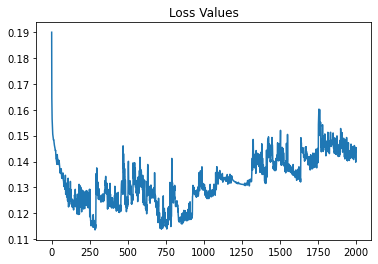

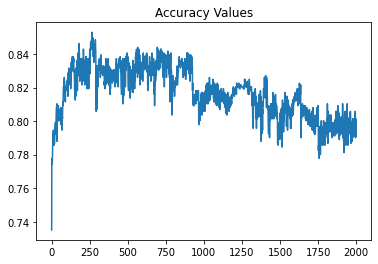

In [36]:
plot1 = plt.figure(1)
plt.plot(loss_values)
plt.title("Loss Values")
plt.show()

plot2 = plt.figure(2)
plt.plot(acc_values)
plt.title("Accuracy Values")
plt.show()

In [37]:
def predict(data):
    HasilPredict = []
    for i in data:
      # Hidden Layer1
      o_hidden1 = np.matmul(i, w_hidden1) + b_hidden1
      o_hidden1 = sig(o_hidden1)
      # Hidden Layer2
      o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
      o_hidden2 = sig(o_hidden2)
      # Outpur Layer
      o_output  = np.matmul(o_hidden2, w_output) + b_output
      o_output  = sig(o_output)
      HasilPredict.append(round(float(o_output)))
    return HasilPredict

In [38]:
prediksi = predict([x_train[4]])
print(prediksi)
#e is 0
#p is 1
for i in prediksi :
  if i == 1 :
    print('Result : 1')
  elif i == 0 :
    print('Result : 0')

[0]
Result : 0


In [39]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [40]:
from tkinter import *
from tkinter.ttk import Combobox
from tkinter import messagebox


class Test:
    def __init__(self, tk):
        self.var = StringVar()
        self.data = (0, 1)
        self.lb0 = Label(tk,  text = 'MULTILAYER PERCEPTRON PREDIKSI KESELAMATAN PENUMPANG TITANIC',
                         font = ("Times",12)).place(x=15,y=0)
        self.lb1 = Label(tk,  text = 'Sex',font = ("Times",9)).place(x=5,y=50)
        self.lb2 = Label(tk,  text = 'Age',font = ("Times",9)).place(x=5,y=75)
        self.lb3 = Label(tk,  text = 'SibSp',font = ("Times",9)).place(x=5,y=100)
        self.lb4 = Label(tk,  text = 'Parch',font = ("Times",9)).place(x=5,y=125)
        self.lb5 = Label(tk,  text = 'Fare',font = ("Times",9)).place(x=5,y=150)
        self.lb6 = Label(tk,  text = 'Embarked',font = ("Times",9)).place(x=5,y=175)
        #---------------------------------------------------------------------------------------------
        self.cb1 = Combobox(tk, values=self.data,font = ("Times",9), width=17)
        self.cb1.place(x=80, y=50)
        self.e2  = Entry(tk,font = ("Times",9) )
        self.e2.place(x=80,y=75)
        self.e3  = Entry(tk,font = ("Times",9) )
        self.e3.place(x=80,y=100)
        self.e4  = Entry(tk,font = ("Times",9) )
        self.e4.place(x=80,y=125)
        self.e5  = Entry(tk,font = ("Times",9) )
        self.e5.place(x=80,y=150)
        self.e6  = Entry(tk,font = ("Times",9) )
        self.e6.place(x=80,y=175)
        #---------------------------------------------------------------------------------------------
        self.b1  = Button(tk, text="Prediksi",font = ("Times",9), command=self.select).place(x=300, y=250, anchor=CENTER)
        self.lb7 = Label(tk,  text = 'Hasil', font = ("Times",9))
        self.lb7.place(x=300, y=300, anchor=CENTER)
        
    def select(self):
        data   = []
        value1 = (float(self.cb1.get())-minn[0])/(maxx[0]-minn[0])
        #messagebox.showinfo("Warn", "You selected " + value)
        value2 = (float(self.e2.get())-minn[1])/(maxx[1]-minn[1])
        value3 = (float(self.e3.get())-minn[2])/(maxx[2]-minn[2])
        value4 = (float(self.e4.get())-minn[3])/(maxx[3]-minn[3])
        value5 = (float(self.e5.get())-minn[4])/(maxx[4]-minn[4])
        value6 = (float(self.e6.get())-minn[5])/(maxx[5]-minn[5])
        data.append(value1)
        data.append(value2)
        data.append(value3)
        data.append(value4)
        data.append(value5)
        data.append(value6)
        HasilPredict = []
        print(data)
        for i in data:
            # Hidden Layer1
            o_hidden1 = np.matmul(data, w_hidden1) + b_hidden1
            o_hidden1 = sig(o_hidden1)
            # Hidden Layer2
            o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
            o_hidden2 = sig(o_hidden2)
            # Outpur Layer
            o_output  = np.matmul(o_hidden2, w_output) + b_output
            o_output  = sig(o_output)
            HasilPredict.append(round(float(o_output)))
        for i in HasilPredict:
            if i == 1 :
                a = 'Selamat'
            elif i == 0 :
                a = 'Tewas'
        self.lb7.config(text=a)
tk = Tk()
tk.geometry("600x350")
tk.title("MULTILAYER PERCEPTRON")
tt = Test(tk)
tk.mainloop()

[1.0, 0.7613636363636364, 0.6666666666666666, 0.8333333333333334, 0.97165991902834, 1.0]
[0.0, 0.7613636363636364, 0.6666666666666666, 0.8333333333333334, 0.97165991902834, 1.0]
[0.0, 0.5681818181818182, 0.6666666666666666, 0.8333333333333334, 0.97165991902834, 1.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.8333333333333334, 0.97165991902834, 1.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.97165991902834, 1.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.6072874493927125, 1.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.6072874493927125, 0.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.46558704453441296, 0.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.708502024291498, 0.0]
[0.0, 0.3409090909090909, 0.16666666666666666, 0.6666666666666666, 0.708502024291498, 0.0]
[0.0, 0.5227272727272727, 0.16666666666666666, 0.0, 0.708502024291498, 0.0]
[0.0, 0.5227272727

C:\Python3_7\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[1.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[1.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[1.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[1.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.00809716599190283